<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C%20%EB%B0%94%EB%A1%9C%20git%20%EC%9C%BC%EB%A1%9C%20%EC%98%AC%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df = pd.DataFrame([[1,2],[3,4],[5,6]], columns=['var_1','var_2'], index=['a','b','c'])

In [5]:
df

,var_1,var_2
a,1,2
b,3,4
c,5,6


In [6]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/sample_df.csv'
sample_df = pd.read_csv(file_url, index_col=0)

In [7]:
sample_df

,var_1,var_2,var_3,var_4,var_5
a,2,2,1,4,3
b,4,3,3,7,1
c,5,4,6,3,5
d,1,4,5,6,7
e,4,5,7,8,3
f,5,4,8,9,4
g,7,5,2,0,6
h,8,8,1,7,8
i,2,3,5,2,1
j,9,3,7,6,5


In [11]:
sample_df[['var_1','var_2']]

,var_1,var_2
a,2,2
b,4,3
c,5,4
d,1,4
e,4,5
f,5,4
g,7,5
h,8,8
i,2,3
j,9,3


In [14]:
sample_df.loc['a':'c']

,var_1,var_2,var_3,var_4,var_5
a,2,2,1,4,3
b,4,3,3,7,1
c,5,4,6,3,5


In [15]:
sample_df.reset_index(drop=True)

,var_1,var_2,var_3,var_4,var_5
0,2,2,1,4,3
1,4,3,3,7,1
2,5,4,6,3,5
3,1,4,5,6,7
4,4,5,7,8,3
5,5,4,8,9,4
6,7,5,2,0,6
7,8,8,1,7,8
8,2,3,5,2,1
9,9,3,7,6,5


In [16]:
sample_df.aggregate(['sum','mean'])

,var_1,var_2,var_3,var_4,var_5
sum,47.0,41.0,45.0,52.0,43.0
mean,4.7,4.1,4.5,5.2,4.3


In [17]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/iris.csv'
iris = pd.read_csv(file_url)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,6.1,3.0,4.6,1.4,versicolor
1,7.2,3.0,5.8,1.6,virginica
2,6.7,3.1,4.4,1.4,versicolor
3,6.2,2.9,4.3,1.3,versicolor
4,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
145,5.7,2.5,5.0,2.0,virginica
146,6.3,2.9,5.6,1.8,virginica
147,6.8,3.2,5.9,2.3,virginica
148,6.1,2.8,4.7,1.2,versicolor


In [18]:
iris.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [19]:
iris.groupby('class').agg(['count','mean'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                       count   mean            count   mean             count   
class                                                                           
setosa                    50  5.006               50  3.428                50   
versicolor                50  5.936               50  2.770                50   
virginica                 50  6.588               50  2.974                50   

                  petal width (cm)         
             mean            count   mean  
class                                      
setosa      1.462               50  0.246  
versicolor  4.260               50  1.326  
virginica   5.552               50  2.026

선형회귀 : 보험료 예측 하기

In [21]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [24]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [31]:
X = data.iloc[:,0:5]
y = data.iloc[:,-1]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
pred = model.predict(X_test)

In [42]:
pred

array([ 4765.24946593,  4957.73086482,  8298.98815254,  3078.81186784,
       24165.95654247, 36827.72848649, 14683.34729348,  2599.3384217 ,
       29378.62194348, 16011.75090087, 15493.17858732,  5101.23688482,
       11011.10641383,  4161.31766196,  9810.62254709, 31856.8853975 ,
       12016.55190749, 13235.61067675,  7251.8789603 , 18394.80961708,
       14393.20060321,  3253.85100146,  6715.71478454, 31290.24757633,
       13776.33709853, 31904.24021054,  6397.17630407, 39339.48397832,
       31565.9666249 , 13742.23078678, 18448.10494977,  2282.95976263,
       38922.93999878, 26116.16609375,  8866.70869349, 12036.24255782,
        8406.17827743, 32351.5635203 ,  3959.06572303, 38354.72996424,
        8219.4129384 , 12308.73069101,  5604.28772112,  8468.4404493 ,
         651.06780185,  5503.69704365,  5673.30373447,  3843.67247433,
        2098.72488739, 11186.31121281, 17460.67125615,  7916.72813038,
        5042.69712676,  8273.18990771,  7541.05592985, 14372.15862948,
      

In [43]:
comparision = pd.DataFrame({'actual': y_test, 'pred': pred})

<Axes: xlabel='actual', ylabel='pred'>

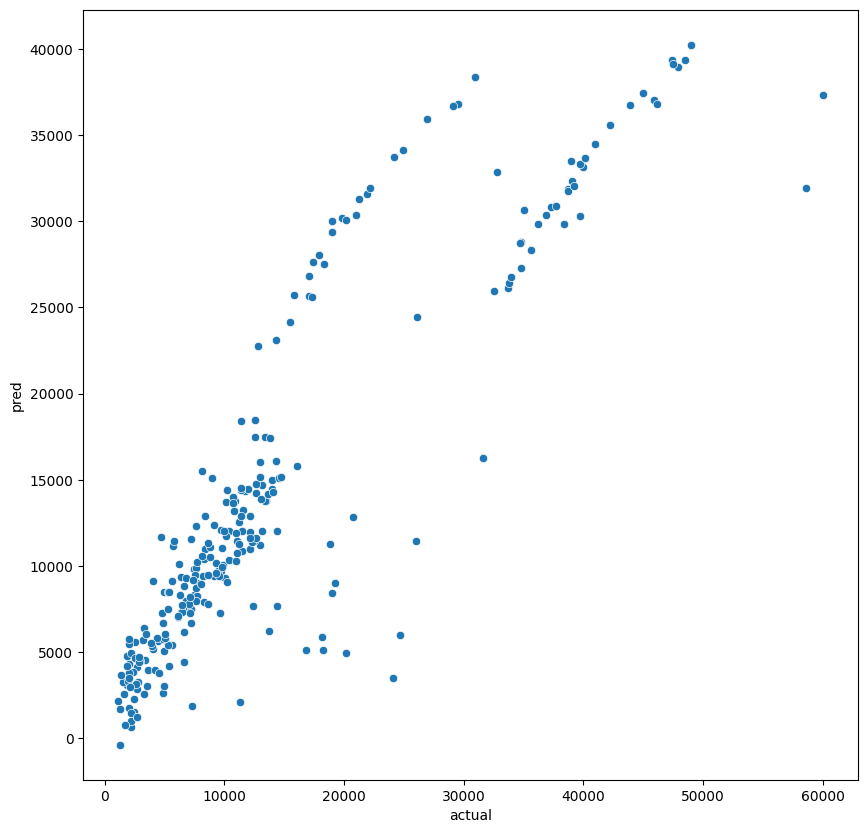

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='actual', y='pred', data=comparision)

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred) ** 0.5

5684.927776334485

결정 계수 (R2) = SSR/SST .. 좋은 모델일 수록 1에 가깝다.
SST (Sum of Squares Total) = SSE(Sum of Squares Error) + SSR(Sum of Squares Regression)

In [46]:
model.score(X_train, y_train)

0.7368220127747351

In [47]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [49]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [50]:
model.intercept_

-11576.999976112367

# 로지스틱 회귀

In [51]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

In [52]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [54]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [57]:
# data.corr() 는 문자 때문에 오류.
x = data[['Pclass','Age','SibSp','Parch','Survived']]
x.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


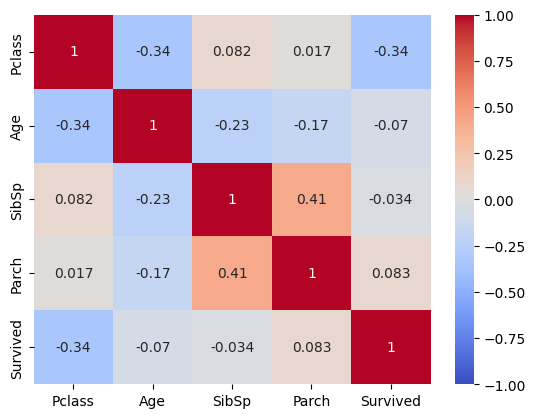

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(x.corr(), cmap='coolwarm',vmin=-1, vmax=1, annot=True)
plt.show()

범주형 변수를 변환,  더미 변수 및 원-핫 인코딩

In [62]:
data = data.drop(['Name','Ticket'], axis=1)

In [63]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [64]:
pd.get_dummies(data, columns=['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [66]:
data = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)
data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [68]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [70]:
pd.Series(model.coef_[0], index=X.columns)

Pclass       -1.182185
Age          -0.039915
SibSp        -0.321211
Parch         0.007793
Sex_male     -2.568822
Embarked_Q   -0.077872
Embarked_S   -0.235037
dtype: float64

# 변수 합치기

In [71]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [72]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7921348314606742

# KNN (K Nearest Neighbors) K-최근접 이웃  .. 다중 분류

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

# 위에서 보면 178 에서 어떤 것은 176 으로 결측치가 존재 한다는 의미

In [75]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [77]:
data['class'].unique()

array([0, 1, 2])

In [78]:
data['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

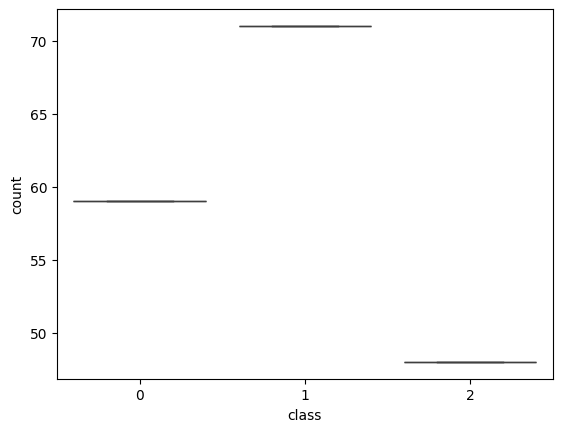

In [79]:
sns.boxplot(x=data['class'].value_counts().index, y = data['class'].value_counts())

<Axes: ylabel='count'>

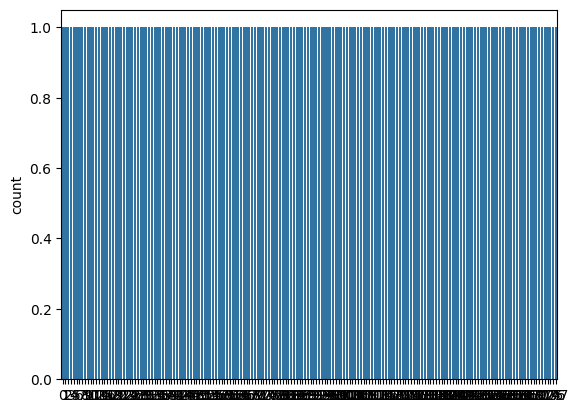

In [80]:
sns.countplot(data['class'])

In [81]:
data.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [83]:
data.dropna().isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

# 결측 행만 제거하자.

In [85]:
data.dropna(subset=['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [86]:
data.dropna(subset=['alcohol']).isna().mean()

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [87]:
data.fillna(data.mean())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


결측치는 통상적으로 50 % 이상이면 drop 을 고려하고, ...

아웃 라이어에 덜 민감한 적용은 중위값이다.
data.fillna(data.median(), inplace=True)

# inplace 는 변경하는 것이다.


In [88]:
data.fillna(data.median(), inplace=True)

In [89]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

# 결측치를 처리한 후에는 스케일링에 신경쓰자

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [92]:
st_scaler = StandardScaler()

In [93]:
st_scaler.fit(data)

StandardScaler()

In [95]:
st_scaled = st_scaler.transform(data)
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [96]:
st_scaled = pd.DataFrame(st_scaled, columns=data.columns)

In [97]:
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


# RobustScaler 는 표준편차가 아닌 사분위 값으로 계산 된다.
표준화 스케일링, 최소-최대 스케일링은 아웃라이어가 존재 할 때 영향을 받는다. 그러나, 로버스트 스케일링은 받지 않는다.  

# 스케일링 전에
1. 반드시 종속 변수를 제외해야 하고,
2. 훈련셋과 시험셋을 먼저 나누고, 각각 스케일링을 할 생각을 해야 한다.

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=100)

In [100]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [101]:
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

# 하이파라미터인 n_neighbors = 5 (기본 값) 을 변경하면 된다.

In [109]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

# 자동으로 최적의 하이퍼파라미터를 찾자.

In [111]:
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222
